# Example - Merging LTS result files

This notebook demonstrates how you could merge LTS result files that were created by seperate simulations.

Why might this be useful?
- Extending LTS simulation results without re-running periods that were already calculated.
- Splitting LTS simulations up in time to run multiple simulations simultaneously (e.g. multiple processes on one or more computers).

In [1]:
import mikeio
from mikeio1d import Res1D
import pandas as pd

# Review the LTS simulation job list

First, let's look at the MIKE job list file (.MJL) that contains the indivudal simulation events. It uses the PFS file format, which is readble with MIKE IO.

In [2]:
mjl_file_path = r"C:\Users\rywm\OneDrive - DHI\Documents\MIKE+ Examples\CS, Rivers, 2D\Sirius LTS\Sirius_LTSBase.MJL"
mjs_file = mikeio.read_pfs(mjl_file_path, unique_keywords=False)

Parse the MJL file into a pandas dataframe for easier viewing.

In [3]:
df_jobs = pd.DataFrame([e.to_dict() for e in mjs_file.MIKE1D_JOB_LIST.SIMULATION_EVENT])
df_jobs

,Simulation_start,Simulation_end,Simulation_end_no_duration,Hotstart_file,Hotstart_time,Hotstart_hydrological_inflow,Duration,Job_number,Job_start_criterion,Job_stop_criterion
0,1933-07-22 16:31:00,1933-07-22 19:19:00,1933-07-22 19:09:00,Hot_StartLTSBase.res1d,2019-09-01 16:31:00,0.0,02:48:00,1,JL_Start_1,JL_Start_1
1,1933-07-31 18:56:00,1933-07-31 20:28:00,1933-07-31 20:18:00,Hot_StartLTSBase.res1d,2019-09-01 18:56:00,0.0,01:32:00,2,JL_Start_1,JL_Start_1
2,1933-08-01 19:43:00,1933-08-02 00:19:00,1933-08-02 00:09:00,Hot_StartLTSBase.res1d,2019-09-01 19:43:00,0.0,04:36:00,3,JL_Start_1,JL_Start_1


There are 95 simulation events defined by this MJL file.

# Inspect the first LTS result simulation

Now let's open up the first LTS result file. In this example, each simulation produces three result files that we'll inspect one by one:

* Network HD: the raw hydrodynamic results of each simulated event
* LTS chronological statistics: 
* LTS extreme statistics: 

#### Inspect Network HD results

In [4]:
res1_hd = Res1D(
    r"C:\Users\rywm\OneDrive - DHI\Documents\MIKE+ Examples\CS, Rivers, 2D\Sirius LTS\Sirius_LTS_m1d - Result Files\Sirius_LTSBaseDefault_Network_HD.res1d"
)
res1_hd

<mikeio1d.Res1D>
Start time: 1933-07-22 16:31:00
End time: 1933-08-03 01:39:00.801000
# Timesteps: 3502
# Catchments: 0
# Nodes: 569
# Reaches: 599
# Globals: 0
0 - WaterLevel <m>
1 - Discharge <m^3/s>
2 - FlowVelocity <m/s>
3 - DischargeInStructure <m^3/s>
4 - ControlStrategyId <Integer>
5 - GateLevel <m>

In [5]:
res1_hd.result_network.reaches.C20212804_1.Discharge.read().head()

,Discharge:C20212804.1:27.8333,Discharge:C20212804.1:83.5,Discharge:C20212804.1:139.167
1933-07-22 16:31:00.000,0.002501,0.002501,0.002501
1933-07-22 16:32:00.000,0.004209,0.004251,0.004254
1933-07-22 16:33:00.000,0.004114,0.004204,0.004241
1933-07-22 16:34:00.202,0.004040,0.004138,0.004204
1933-07-22 16:35:17.791,0.003893,0.004041,0.004134


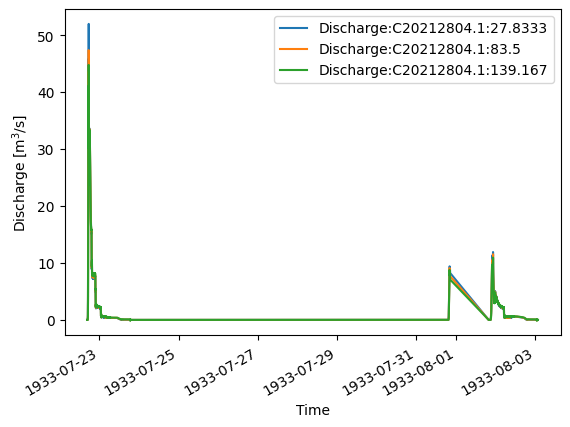

In [6]:
res1_hd.result_network.reaches.C20212804_1.Discharge.plot()

It would be more clear if the job events were visible somehow, so let's do that.

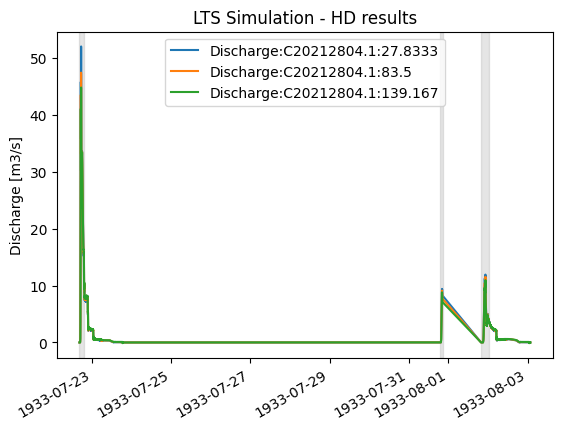

In [7]:
ax = res1_hd.result_network.reaches.C20212804_1.Discharge.read().plot(
    title="LTS Simulation - HD results", ylabel="Discharge [m3/s]"
)
for start, end in zip(df_jobs["Simulation_start"], df_jobs["Simulation_end"]):
    ax.axvspan(start, end, alpha=0.2, color="grey")

#### Inspect chronological statistics

In [8]:
res1_chron = Res1D(
    r"C:\Users\rywm\OneDrive - DHI\Documents\MIKE+ Examples\CS, Rivers, 2D\Sirius LTS\Sirius_LTS_m1d - Result Files\Sirius_LTSBaseDefault_LTS_chronological_statistics.res1d"
)
res1_chron

<mikeio1d.Res1D>
Start time: 1933-07-22 16:31:00
End time: 1934-01-01 00:00:00
# Timesteps: 2
# Catchments: 0
# Nodes: 569
# Reaches: 599
# Globals: 3
0 - SurchargeIntegratedAnnual <m^3>
1 - SurchargeIntegratedAnnualCount <()>
2 - SurchargeIntegratedAnnualDuration <h>
3 - DischargeIntegratedAnnual <m^3>
4 - DischargeIntegratedAnnualCount <()>
5 - DischargeIntegratedAnnualDuration <h>
6 - DischargeIntegratedAnnualTotalOutflow <m^3>
7 - DischargeIntegratedAnnualWeirs <m^3>
8 - DischargeIntegratedAnnualOutlets <m^3>

In [9]:
df = res1_chron.read()
df

,SurchargeIntegratedAnnual:C14150801,SurchargeIntegratedAnnualCount:C14150801,SurchargeIntegratedAnnualDuration:C14150801,DischargeIntegratedAnnual:C14150801,DischargeIntegratedAnnualCount:C14150801,DischargeIntegratedAnnualDuration:C14150801,SurchargeIntegratedAnnual:C14150802,SurchargeIntegratedAnnualCount:C14150802,SurchargeIntegratedAnnualDuration:C14150802,DischargeIntegratedAnnual:C14150802,...,DischargeIntegratedAnnualDuration:Orifice:Sir40.3_O:53.0656,DischargeIntegratedAnnual:Orifice:Sir40.4_O:53.0656,DischargeIntegratedAnnualCount:Orifice:Sir40.4_O:53.0656,DischargeIntegratedAnnualDuration:Orifice:Sir40.4_O:53.0656,DischargeIntegratedAnnual:Orifice:Sir5.1_O:34.1922,DischargeIntegratedAnnualCount:Orifice:Sir5.1_O:34.1922,DischargeIntegratedAnnualDuration:Orifice:Sir5.1_O:34.1922,DischargeIntegratedAnnualTotalOutflow,DischargeIntegratedAnnualWeirs,DischargeIntegratedAnnualOutlets
1933-01-01,68.349731,1.0,0.136111,1013.091187,3.0,17.141693,29.680014,1.0,0.130556,0.155408,...,0.28845,0.0,0.0,0.0,0.0,0.0,0.0,564565.6875,159294.875,405270.78125
1934-01-01,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.00000


<Axes: title={'center': 'LTS Simulation - Chronological results'}, ylabel='DischargeIntegratedAnnualWeirs'>

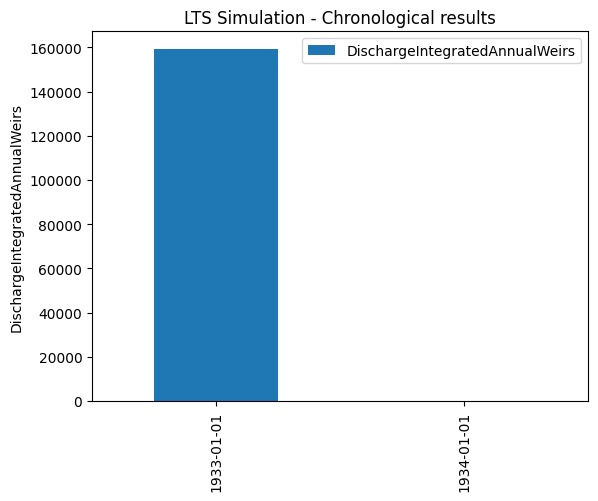

In [10]:
df = res1_chron.result_network.global_data.DischargeIntegratedAnnualWeirs.read()
df.index = df.index.date
df.plot(
    kind="bar",
    title="LTS Simulation - Chronological results",
    ylabel="DischargeIntegratedAnnualWeirs",
)

#### Inspect extreme statistics

In [11]:
res1_ext = Res1D(
    r"C:\Users\rywm\OneDrive - DHI\Documents\MIKE+ Examples\CS, Rivers, 2D\Sirius LTS\Sirius_LTS_m1d - Result Files\Sirius_LTSBaseDefault_LTS_extreme_statistics.res1d"
)
res1_ext

<mikeio1d.Res1D>
Start time: 1933-07-22 16:31:00
End time: 1934-07-22 16:31:00
# Timesteps: 25
# Catchments: 0
# Nodes: 569
# Reaches: 599
# Globals: 0
0 - WaterLevelMaximum <m>
1 - WaterLevelMaximumTime <sec>
2 - DischargeMaximum <m^3/s>
3 - DischargeMaximumTime <sec>
4 - SurchargeMaximum <m^3/s>
5 - SurchargeMaximumTime <sec>
6 - SurchargeIntegrated <m^3>
7 - SurchargeIntegratedTime <sec>
8 - DischargeIntegrated <m^3>
9 - DischargeIntegratedTime <sec>
10 - SurchargeDuration <h>
11 - SurchargeDurationTime <sec>
12 - FlowVelocityMaximum <m/s>
13 - FlowVelocityMaximumTime <sec>

# Merge results

In [ ]:
# TODO: Above overlaps somewhat with general LTS reading / viewing - consider organizing.
# - Also need to  use a non-local result file example

In [13]:
# TODO: Need to implement merging of LTS results before continuing